## Content

### kNN

- Blinkit Problem Statement
 - Issue with Logistic Regression

- Geometric Intuition
 - [Class determination](https://www.scaler.com/hire/test/problem/16260/)
 - [k Nearest Neighbors](https://www.scaler.com/hire/test/problem/15900/)


- The KNN Algorithm
 - [Selecting K](https://www.scaler.com/hire/test/problem/15860/)

- kNN Scratch Code
 - [KNN Implementation](https://www.scaler.com/hire/test/problem/25235/)

- Assumption of KNN

- Sklearn's KNN implementation
- Bias-Variance Trade Off in KNN
 - [Bias-variance in KNN](https://www.scaler.com/hire/test/problem/30105/)
 - [KNN Bias Variance](https://www.scaler.com/hire/test/problem/15898/)
 - [KNN properties](https://www.scaler.com/hire/test/problem/16455/)
 - [Find Optimal K](https://www.scaler.com/hire/test/problem/25269/)
 - [Nuts and Bolts of KNN](https://www.scaler.com/hire/test/problem/20423/)
 - [House price prediction](https://www.scaler.com/hire/test/problem/15903/)

-  Train and Test Time-Complexity
 - [KNN Time Complexity](https://www.scaler.com/hire/test/problem/15857/)


- kNN for categorical
 - Issue with Euclidean
 - Mahattan Distance
 - Minkowski Distance
 - Cosine Similarity
 - [Distance metrics in KNN](https://www.scaler.com/hire/test/problem/16456/)
 - [Manhattan Distance](https://www.scaler.com/hire/test/problem/16082/)
 - [Calculate Distance](https://www.scaler.com/hire/test/problem/24768/)
 - [KNN Distance](https://www.scaler.com/hire/test/problem/20530/)



-  LSH


-  kNN based imputation
 - [Correct statements](https://www.scaler.com/hire/test/problem/15899/)
 - [Scaling in k-NN](https://www.scaler.com/hire/test/problem/16457/)
 - [More about KNN](https://www.scaler.com/hire/test/problem/20527/)



# **Business Case**

**Blinkit** is trying to find an **optimal number of delivery partners per store** for faster delivery

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/471/original/Screenshot_2023-07-23_at_7.43.57_PM.png?1690130758 width=700>



- Hence it has classified its store into 3 classes based on
 - how much products are delivered from a store

1. Class1 : High Traffic (Needs a high number of delivery partners)
2. Class2 : Moderate Traffic (Needs a decent number of delivery partners)
3. Class3 : Low Traffic (Needs a very small number of delivery partners)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 27.0MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|Fresh food products delivery count |
|**Milk**|milk products delivery count|
|**Grocery**|Grocery products delivery count|
|**Frozen**|Frozen food products delivery count|
|**Detergents_Paper**|washing products delivery count|
|**Delicassen**|imported products, cooked meat delivery count|
|**class**|Store catgeory (Class1, Class2, Class3)|





Now lets see the count of sample each of the three classes

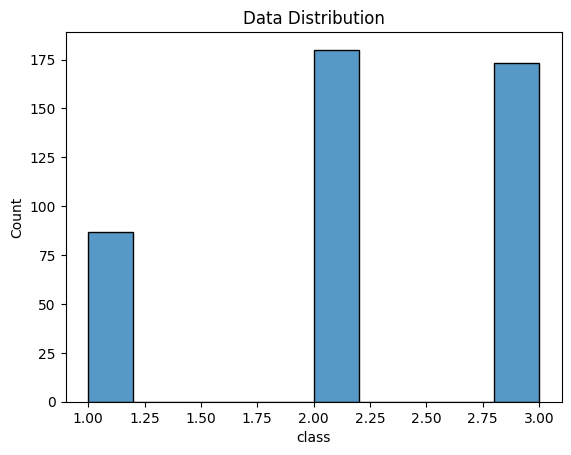

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

**quiz**

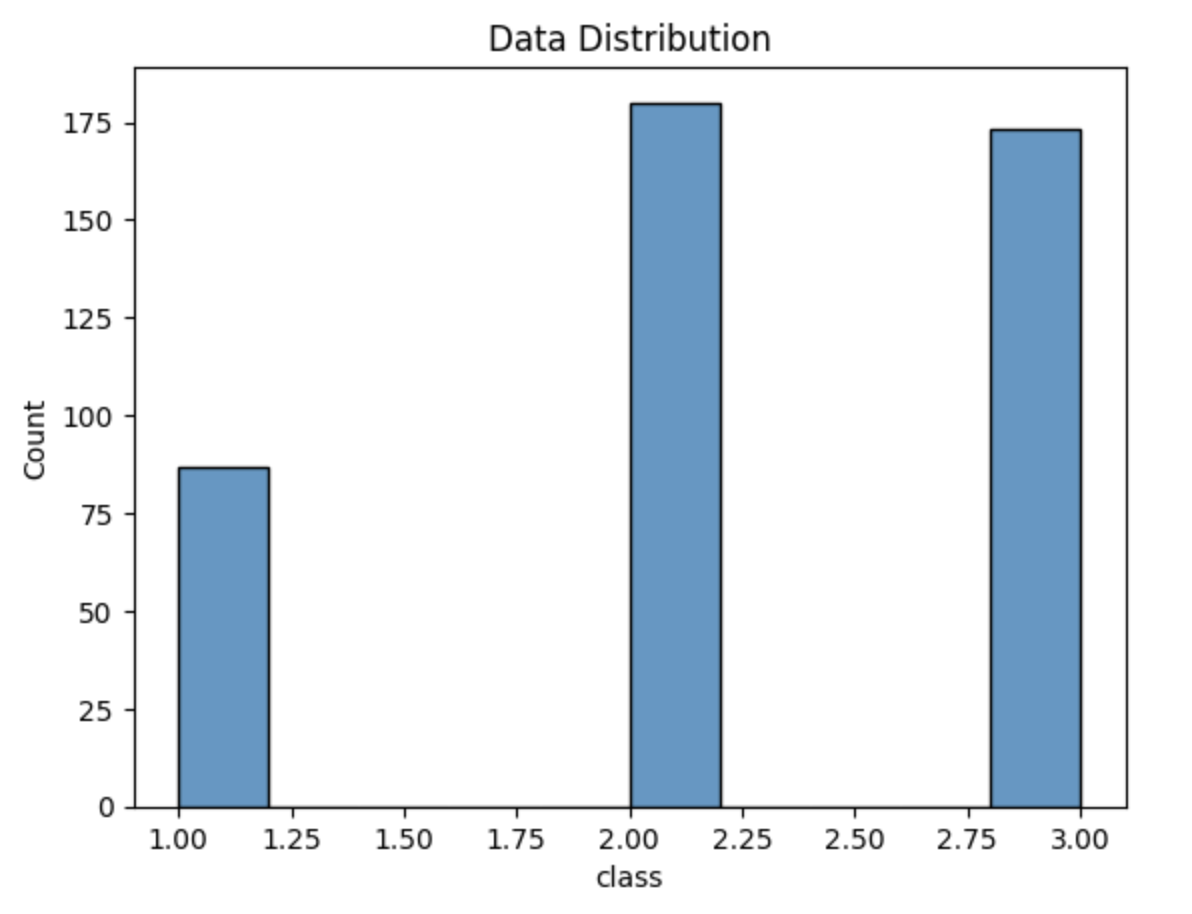

```
What can be said about the data ?

a) Multi-class balanced data
b) Multi-class imbalanced data
c) Binary-class imbalanced data
d) Binary-class balanced data

```
**correct Answer**

b) Multi-class imbalanced data

Lets now define our X and y for the model and visualize the data

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

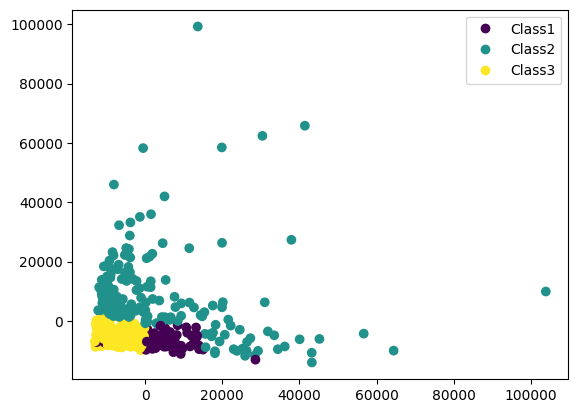

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])



**observe**

Data is not only **multi classed imbalanced** data
- It is also **Non-Linear in nature**



**quiz** (what do you think)

```
How will Logistic Regression handle non-linear,multi-class data ?

A) Polynomial, OneVsRest
B) Linear, OneVsRest
C) OneVsRest, Polynomial
D) OneVsRest, Linear


```
**Correct Answer**
A) Polynomial, OneVsRest

#### Imagine if data ($n \approx 1 million $), will Polynomial Logistic Regression model be the right model ?

Ans: No, Clearly it will require **a lot of hyperparameter tuning**:
- for finding the **correct polynomial features for Logistic Regression**


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/473/original/Screenshot_2023-07-23_at_7.44.08_PM.png?1690130923 width=700>


This process will be time consuming, hence not the ideal approach

<br>

#### If store categories changes from 3 to 50, will OVR be the ideal approach ?

Ans: No, since for a  **50 class data, 50 different Logistic Regression model** will be required:
-  This process will be both **Expensive and time consuming**

<br>

Hence **Polynomial OVR Logistic Regression model not the ideal approach**

# **Geometric Intuition of kNN**

#### What model can be used for this Non-linear Multi-Class data ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/472/original/Screenshot_2023-07-23_at_7.44.16_PM.png?1690130898 width=700>

Imagine if our training data looks like:

1. Class 1 data $→ (+) $
2. Class 2 data $→ (-) $
3. Class 3 data $→ (o) $







#### If we have a test data sample,($x^{q1}$), what will be class label for it ?

Ans: Clearly, $x^{q1}$ belongs to $(+)$ Class


<br>

#### What will be the class label for ($x^{q2}$) ?
Ans: $x^{q2}$ belongs to $(-)$ Class


#### How are we sure that $(x^{q1})$ belongs to $(+)$ and $(x^{q2})$ belongs to $(-)$ class ?



Ans: Simply by:
- **Observing the neighboring points** of $(x^{q1})$ and noticing as most points belong to $(+)$ Class,
 - hence $(x^{q1})$ → $(+)$

- Similarly for $(x^{q2})$,  **most of the neighboring points → (-) class**
 - hence $(x^{q2})$ → $(-)$


<br>


kNN (k Nearest Neighbour) algorithm works on the same intuition:
- Defining **class of the test datapoint based** on the **classes of the neighbourhood** of that datapoint


# **Understanding kNN**

#### How does kNN work with neighborhood of datapoint ?

Ans: Lets understand kNN with an example, Suppose **we have a test datapoint ($x^q = [2,5]$) and we have 6 training data such that**:

||f1|f2|y|
|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1
|$x^{(2)}$|6|4|1
|$x^{(3)}$|8|2|3
|$x^{(4)}$|7|5|3
|$x^{(5)}$|1|4|2
|$x^{(6)}$|2|2|2


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/474/original/Screenshot_2023-07-23_at_7.44.29_PM.png?1690130963 width=700>

1. **Step1:** We find the  **Euclidean distance between $x_q = [2,5]$ and all the training data.**


||f1|f2|y|$d^{(i)} = \sqrt{(x^q_{f1}-x^{(i)}_{f1})^2 + (x^q_{f2}-x^{(i)}_{f2})^2}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$\sqrt{(1^2 + 1^2)} = 1.41$|
|$x^{(2)}$|6|4|1|$\sqrt{(4^2 + 1^2)} = 3.00$|
|$x^{(3)}$|8|2|3|$\sqrt{(6^2 + 3^2)} = 6.48$|
|$x^{(4)}$|7|5|3|$\sqrt{(5^2 + 0^2)} = 5.00$|
|$x^{(5)}$|1|4|2|$\sqrt{(1^2 + 1^2)} = 1.41$|
|$x^{(6)}$|2|2|2|$\sqrt{(0^2 + 2^2)} = 2.00$|



  

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/475/original/Screenshot_2023-07-23_at_7.44.37_PM.png?1690130998 width=700>

2. **Step2:** We sort the data based on the distances:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|
|$x^{(4)}$|7|5|3|$5.00$|
|$x^{(3)}$|8|2|3|$6.48$|

<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/476/original/Screenshot_2023-07-23_at_7.44.47_PM.png?1690131021 width=700>


3. **Step 3:** Assume we pick the 3 datapoints such that:
-  The distance from $x_q$ is minimum

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|

Hence we pick $x^{(1)},x^{(5)},x^{(6)}$


<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/477/original/Screenshot_2023-07-23_at_7.44.57_PM.png?1690131095 width=700>


4. **Step4:** Find the majority vote on the class $(y)$ for these selected datapoints:
- And the **class which is in majority** becomes the **class label for $x_q$**

hence here  Class of $x_q = 2$

<br>

**Note:** This selection of datapoints  is done using a hyperparameter $k$,
- hence the algorithm is called $k$ nearest neighbors



**QUIZ**

```
If x1 at (4,0) , x2 at (0,1) and x3 (5,0) and xq at (0,0). Which is nearest point to xq ?

a. x1
b. x2
c. x3

```

**Answer**

b. x2


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/479/original/Screenshot_2023-07-23_at_7.45.06_PM.png?1690131159 width=700>

#### What happens if $k = 4$ for kNN ?

Ans:  Lets look into the sorted data:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|
|$x^{(4)}$|7|5|3|$5.00$|
|$x^{(3)}$|8|2|3|$6.48$|


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/478/original/Screenshot_2023-07-23_at_7.45.15_PM.png?1690131134 width=700>



Now we will select the nearest 4 datapoints:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|


**observe**

$x^{(1)}$ and $x^{(2)}$ → Class1 while  $x^{(5)}$ and $x^{(6)}$ → Class2

**kNN cannot make a prediction**
- As there is a tie in majority vote

<br>


**note:** It is advisable to have $k \in odd$
- So  to avoid this issue of tie in majority vote.






Suppose we took $k =5 $ and the nearest neighbor looks like:

||y|
|:--|:--|
|$x^{(1)}$| 1 |
|$x^{(5)}$| 2 |
|$x^{(2)}$| 1 |
|$x^{(7)}$| 2 |
|$x^{(4)}$| 3 |


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/480/original/Screenshot_2023-07-23_at_7.45.24_PM.png?1690131190 width=700>


#### How to make prediction for when $k \in odd$ and have tie in majority vote ?
Ans: In such case, the hack is to:
- **Randomly pick the class label for any of the tied Classes**




For this example:

||y|
|:--|:--|
|$x^{(1)}$| 1 |
|$x^{(5)}$| 2 |
|$x^{(2)}$| 1 |
|$x^{(7)}$| 2 |
|$x^{(4)}$| 3 |


- kNN randomly picks Class1 or Class 2


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/482/original/Screenshot_2023-07-23_at_7.45.40_PM.png?1690131330 width=700>

# **kNN Scratch Code**

lets split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [ ]:
y_sm.value_counts()

,count
class,
1,99
2,99
3,99


Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

kNN Implementation from Scratch
 with k = 5

taking the 50th Val data as our $x_q$

In [ ]:
X_val_scaled[50]

array([ 0.70696002, -0.59996414, -0.44398822, -0.64780861, -0.30877225,
       -0.49601444, -0.2789479 ])

finding distance

In [ ]:
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [ ]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [ ]:
# Nearest/First K points
distances = distances[:5]

In [ ]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [ ]:
print('Neighbors[(distance),(Label)]:',distances)

Neighbors[(distance),(Label)]: [[0.19965226 3.        ]
 [0.21269196 3.        ]
 [0.23155824 3.        ]
 [0.28350219 3.        ]
 [0.29264749 3.        ]]


Formulating into one function

In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

Predicted class label for $x_q$

In [ ]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.19965226 3.        ]
 [0.21269196 3.        ]
 [0.23155824 3.        ]
 [0.28350219 3.        ]
 [0.29264749 3.        ]]
The predicted class label: 3


**Observe**

All the 5 datapoints which are closest to the $x^q$ have:
- The same class labels = 3

Hence due to majority vote:
- $x^q$ → Class3

<br>

Lets see what is the actual class label for $x^q$

In [ ]:
y_val[50]

3

This means that kNN correctly predicted $x^q$



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)


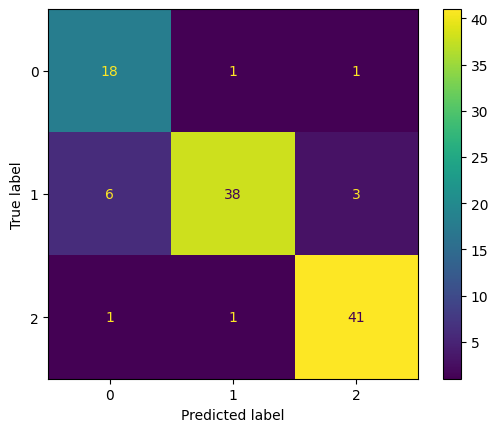

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.90      0.72      0.80        25
           2       0.81      0.95      0.87        40
           3       0.95      0.91      0.93        45

    accuracy                           0.88       110
   macro avg       0.89      0.86      0.87       110
weighted avg       0.89      0.88      0.88       110



**observe**

Clearly the kNN model performed quite well on the data, showing :
- kNN can handle Multi-Class problem
- kNN can handle Non-linearity in the data



# **Assumption of KNN:**

if data contains:
1. 33 $(+)$ Class samples
2. 33 $(-)$ Class samples
3. 33 $(o)$ Class samples

<br>

#### What assumption does kNN makes during prediction ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/481/original/Screenshot_2023-07-23_at_7.45.57_PM.png?1690131249 width=700>

Ans: As kNN works on the principle that:
- All the **characteristic the majority nearest neighbors have, same** should be for the **query datapoint**

- hence **kNN assumes that the neighborhood** for a datapoint must be **homogeneous in nature (having same properties)**




Therefore if there is alot of noise/outliers in the data:


- kNN model fails in most cases

# Sklearn's [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Fit method stores the training datapoints in the kNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean')

Accuracy of KNN on Test data

In [ ]:
knn.score(X_val_scaled, y_val)

0.8795180722891566

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.97      0.89      0.93        38
           3       0.93      0.84      0.88        31

    accuracy                           0.88        83
   macro avg       0.85      0.89      0.86        83
weighted avg       0.90      0.88      0.88        83



Confusion Matrix of KNN on Test Data

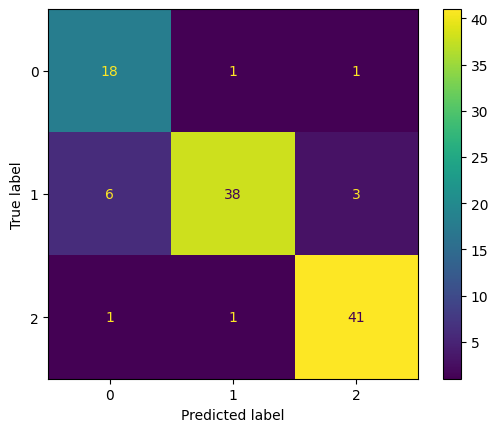

In [ ]:
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

**observe**

The model makes wrong prediction mostly on **Class 1**


#### How to perform hyperparameter tuning to make kNN fit better ?
Ans: for this lets first understand Bias-Variance of kNN

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/483/original/Screenshot_2023-07-23_at_7.46.05_PM.png?1690131383 width=700>

# **Bias-Variance Trade Off in kNN**

#### As no training is required for kNN, so is there no bias-variance tradeoff in kNN ?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/484/original/Screenshot_2023-07-23_at_7.46.15_PM.png?1690131675 width=700>

Ans: Lets understand this, through a training data containing 2 outliers:
1. A $(-)$ Class outlier in 30 sampled $(+)$ Class data
2. A $(+)$ Class outlier in 40 sampled $(-)$ Class data

If there are two test datapoints $x^{(q1)}$ and $x^{(q2)}$ such that:
-  $x^{(q1)}$ is very close to $(-)$ Class outlier
-  $x^{(q2)}$ is very close to $(+)$ Class outlier

#### What will be the class label of $x^{(q1)}$ if k = 1?





Ans: Clearly, $x^{(q1)}$ belongs to $(-)$ Class

- Similarly, $x^{(q2)}$ belongs to $(+)$ Class


<br>

As kNN is trying to fit correctly for every datapoint:
- It clearly has a high variance and low bias


**quiz**

```
what to say if model has high varaince and low bias ?

a) Model overfits
b) Model underfits
```
**correct Answer**
a) Model overfits

**Note:** Fitting on outliers when $k = 1$ shows that:
- If $k⇓$ model starts overfitting

Taking the same training data:
- 31 $(+)$ class data
- 41 $(-)$ class data

<br>

#### What will be class labels for $x^{(q1)}$ if k = 72?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/485/original/Screenshot_2023-07-23_at_7.46.28_PM.png?1690132011 width=700>


Ans: with k = 72:
- kNN considers entire training data and since **majority class = $(-)$ class**
- $x^{(q1)}$ will have class label as $(-)$ class even though its neighborhood has label = $(+)$ class

<br>

**note:** Since kNN :
- Does not even fit the training data
- It has high bias and low variance

Meaning **as $k ⇑$, kNN tends to underfit**





**QUIZ** (what do you think)

```
Is k in kNN a parameter or hyperparameter of the model ?

a)parameter
b)hyperparameter

```

**Correct Answer** b)hyperparameter


**quiz**

```
k→ hyperparameter, then what data to use for hyperparamter tuning ?

a) validation
b) training
c) test
d) entire data


```
**Correct Answer** a) validation

Lets summarize things:

1. if $k ⇑$, it means kNN underfits

2. if $k ⇓$, it means kNN overfits


Hence if we plot Accuracy vs k:

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/486/original/Screenshot_2023-07-23_at_7.46.35_PM.png?1690132043 width=700>

**observe**

1. training accuracy of kNN decreases as k increases
2. Validation accuracy of kNN first increases as k increases , then decreases

Hence we can say:
- when k → very small,
 - since **gap between training and validation accuracy is high**
 - kNN is being a very complex model, and hence it overfits

- when k → very large,
 - though the gap between training and validation accuracy is low, but **training accuracy is worse**
 - kNN is being a very simple model, and hence it underfits

Hyperparameter tuning of kNN

In [ ]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

Visualizing the error and K values

Text(0, 0.5, 'Accuracy')

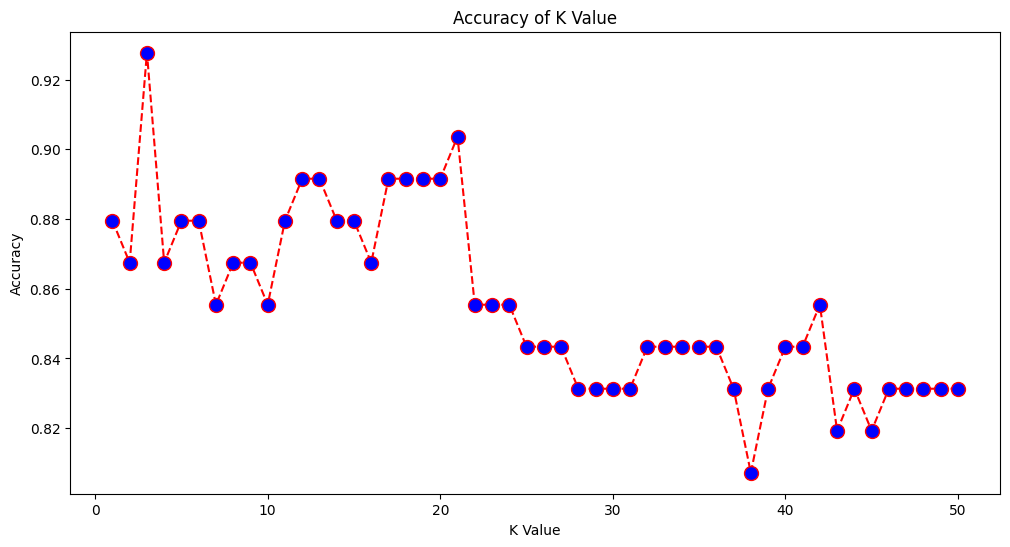

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

**observe**

From this accuracy plot, it is clear that:
- Highest accuracy attained when $k = 5$

- Meaning our intial kNN is the best model

Decision Boundary plot

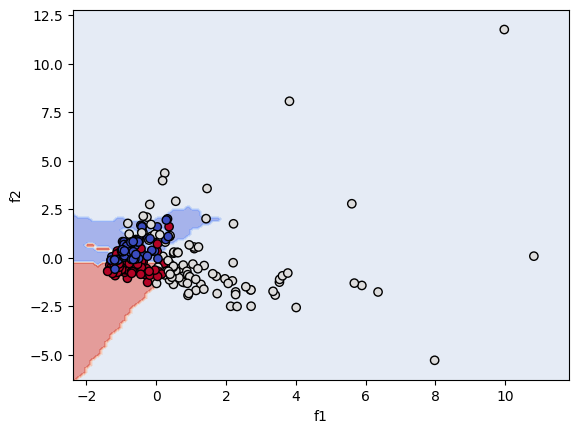

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

**observe**

We can clearly see:
- kNN creates a non-linear decision Boundary

1. **Class1** and its decision boundary → shown in **red**
2. **Class2** and its decision boundary → shown in **sky Blue**
3. **Class3** and its decision boundary → shown in **Blue**

**QUIZ**

```
Which of the following option is true about k-NN algorithm?

1. It is Supervised Learning Algorithm
2. It is Unsupervised Learning Algorithm
```

**ANSWER**:
3. It is Supervised Learning Algorithm  



## **Time-Complexity of KNN**




**quiz**(what do you think)

```
What will be the training time complexity of kNN ?

a) O(nd)
b) O(n)
c) O(nlogn)
d) O(1)
```

**Correct Answer**
d) O(1)

#### Why does training time complexity of kNN is O(1) ?

ans: simply in training time:
- kNN does not perform any kind of computation

- kNN only stores the data

Hence complexity is O(1)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/487/original/Screenshot_2023-07-23_at_7.46.44_PM.png?1690132163 width=700>



#### What is the space complexity of kNN ?
Ans: As kNN is storing the entire training data
- the space complexity → $O(n \times d)$
- where n is the number of samples and d is the number of features

<br>





#### What is the test time complexity of kNN ?
Ans: Since kNN performs all its computation for  query datapoints $x^q$, so lets look into each of them:

1. finding distance from all training data
 - Complexity: $O(n \times d)$

2. Sort the training data based on distance calculated

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/488/original/Screenshot_2023-07-23_at_7.46.52_PM.png?1690132269 width=700>

**quiz**

```
What will be the complexity of optimal sorting algorithm ?

a) O(n^2)
b) O(n)
c) O(n logn)
d) o(1)

```
**correct answer** c) O(n logn)

Complexity for sorting : $O(n \times log n)$

3. Since we pick the k nearest neighbors
 - Complexity becomes: $O(k)$

Hence total complexity becomes:
- $O(n\times d. + n logn + k)$

As k can be very small , as compared to $n$ and $d$, we can ignore it:

- Therefore final test complexity: $O(n \times d + n\times logn)$


**QUIZ**

```
k-NN algorithm does more computation on test time rather than train time.

1. TRUE
2. FALSE
```


**Answer:**

1. True

**Explanation**

- The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.

- In the testing phase, a test point is classified by assigning the label which are most frequent among the k training samples nearest to that query point – hence higher computation.

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/491/original/Screenshot_2023-07-23_at_7.47.00_PM.png?1690132808 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/492/original/Screenshot_2023-07-23_at_7.47.08_PM.png?1690132852 width=700>

# **kNN for Categorical features**

Suppose, we have a diabetic data such that:

1. 40 samples → Diabetic (Class $(+)$)
2. 40 samples → Non-Diabetic(Class $(-)$)



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/489/original/Screenshot_2023-07-23_at_7.47.16_PM.png?1690132318 width=700>

Which contains features:
1. Gender (male, female)
2. Age
3. Blood Group ($A^+,B^+,AB^+,O^+,A^-,B^-,AB^-,O^-)$
4. Glucose level
5. Blood Pressure



<br>


#### Can kNN be used for such a data ?
ans: No, because of the categorical features:
- Euclidean distance cannot be calculated

<br>

Hence **need of converting Categorical data to Numerical**
- So Euclidean distance can be used

**quiz**

```
What are the 2 ways to convert Categorical data to numerical ?

a) One-Hot, Target Encoding
b) One-Hot Encoding, Standardization
c) Target Encoding, Scaling
d) Standardization,Scaling

```
**Correct Answer**
a) One-Hot, Target Encoding

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/490/original/Screenshot_2023-07-23_at_7.47.26_PM.png?1690132755 width=700>

Suppose if we use One Hot Encoding(OHE):
- As Gender feature contains 2 unique values, One Hot Encoding shape changes to $(n,2)$

|Gender|OHE-Male|OHE-Female|
|:--|:--|:--|
|Male|1|0|
|Female|0|1|
|Female|0|1|
|Male|1|0|
|Male|1|0|
|Female|0|1|
|Male|1|0|
|Female|0|1|

<br>

similarly for Blood Group, as there are 8 unique values:
- shape of Blood Group feature becomes: $(n,8)$

<br>







<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/493/original/Screenshot_2023-07-23_at_7.47.33_PM.png?1690132897 width=700>


**observe**

The total dimension of data becomes:

|Feature|dimension|
|:--|:--|
|gender|2|
|Age|1|
|Blood Group|8|
|glucose level|1|
|Blood Pressure|1|
|| $d = 13 $|


# **Problem with Euclidean Distance**





**quiz** (what do you think)

```
if One Hot Encoding increases data dimension to (d=1000), will Eculidean Distance work ?

a) Yes
b) No

```

**Correct Answer**

b) No

#### Why would Euclidean distance not work when there is high dimensional data ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/494/original/Screenshot_2023-07-23_at_7.47.40_PM.png?1690133064 width=700>



Ans: Suppose we have two datapoints $x^{(1)}$ and $x^{(2)}$ and dimension $d= 4$:
- Euclidean finds distance between them
 - $dist(x^{(1)},x^{(2)}) = [\sum_{j = 1}^{d = 4} (x_j^{(1)}-x_j^{(2)})^2]^{\frac{1}{2}}$





<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/495/original/Screenshot_2023-07-23_at_7.47.47_PM.png?1690133190 width=700>

As $(x)^2 = |x|^2$, hence Euclidean distance can also become:
-  $dist(x^{(1)},x^{(2)}) = [\sum_{j = 1}^{d = 4} |x_j^{(1)}-x_j^{(2)}|^2]^{\frac{1}{2}}$

<br>


if we project $x^{(1)}$ and $x^{(2)}$  in 2-D, **Euclidean distance value is large** because:
- dimension is low
- and the **datapoints will be far apart**

<br>



Now if $d = 1000$ , then if we project $x^{(1)}$ and $x^{(2)}$ in 2-D, as **dimension is quite high**:

- the **datapoints will be very close to each other**

- Hence, **Euclidean distance value will be low**

<br>


This **issue of Euclidean distance when data is high dimension** is called **Curse of Dimensionality**


Clearly, Using One Hot Encoding just for 5 features, increases dimension to 13:
- Showing how One Hot Encoding will rapidly increase the dimension of data

Which results in failing of **Euclidean distance** due to **Curse of Dimensionality**

<br>

**Note:** Due to One Hot Encoding high dimensional issue, Target Encoding is used.

- Remember Target Encoding is covered in EDA of Cars-24

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/496/original/Screenshot_2023-07-23_at_7.47.54_PM.png?1690133294 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/497/original/Screenshot_2023-07-23_at_7.48.03_PM.png?1690133331 width=700>

# **Mahattan Distance**





As Euclidean distance is the distance between $x^{(1)}$ and $x^{(2)}$

<br>

#### What other distance to use for  $x^{(1)}$ and $x^{(2)}$ ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/498/original/Screenshot_2023-07-23_at_7.48.09_PM.png?1690133375 width=700>



Ans: lets consider distance $(d_1)$ along one feature $f_1$:
- And distance $(d_2)$ along another feature $f_2$

Now take the sum of $d_1$ and $d_2$:
- $dist(x^{(1)},x^{(2)}) = d_1 + d_2$

<br>

**note:** This distance is known as **Manhattan Distance**
- Manhattan Distance$(dist) = [\sum_{j=1}^{d} |x^{(1)}_j - x^{(2)}_j|^1]^1$





**observe**

There is a common pattern between Euclidean and Manhattan Distance:
- both have $\sum_{j=1}^{d}|x_j^{(1)}-x_j^{(2)}|$

<br>

The only difference lies in the power, hence lets generalize the distance equation:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/499/original/Screenshot_2023-07-23_at_7.48.16_PM.png?1690133415 width=700>


- $dist(x^{(1)},x^{(2)}) = \sum_{j=1}^{d} (|x_j^{(1)}-x_j^{(2)}|^p)^{\frac{1}{p}}$
  

if p = 1:
-  $dist(x^{(1)},x^{(2)}) = \sum_{j=1}^{d} (|x_j^{(1)}-x_j^{(2)}|^1)^{\frac{1}{1}} $
- it becomes Manhattan Distance

if p = 2:

-  $dist(x^{(1)},x^{(2)}) = \sum_{j=1}^{d} (|x_j^{(1)}-x_j^{(2)}|^2)^{\frac{1}{2}} $
- it becomes Euclidean Distance

<br>


**note:** As in Manhattan $\sum_{j=1}^{d}|x_j^{(1)}-x_j^{(2)}|$, which is also used in L1 -Norm($\sum_{j=1}^{d}|w_j|$):
- hence **Manhattan distance** is also called as **L1 Distance**

<br>

Similarly, in Euclidean $\sum_{j=1}^{d}|x_j^{(1)}-x_j^{(2)}|^2$, which is also used in L1 -Norm($\sum_{j=1}^{d}w_j^2$):
- hence **Euclidean distance** is also called as **L2 Distance**

<br>


Also all **these distance metrics are hyperparameters of kNN**





**QUIZ**

```
Which of the following will be Manhattan Distance between the two data point A(1,1,3) and B(1,3,5)?

1. 1
2. 2
3. 4
4. 5

```
**ANSWER**

3. 4

**Explanation**

Man(A,B) = $ |1-1| + |1-3| + |3-5| = 0 + 2 + 2 = 4 $

#### Will Mahattan Distance work for One Hot Encoding ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/500/original/Screenshot_2023-07-23_at_7.48.23_PM.png?1690134078 width=700>


Ans: When using One Hot Encoding:
- $X →$ will be sparse containing many irrelevant features
- **Manhattan distance will consider all features equally**
 - even the irrelevant ones which provide no useful information

<br>



#### What if we used Cosine Similarity as distance when data has One Hot Encoding ?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/501/original/Screenshot_2023-07-23_at_7.48.29_PM.png?1690134118 width=700>

Ans: As **cosine similarity focuses on the direction of the vectors**:
- $Cosine Similarity (x^{(1)},x^{(2)}) = \frac{x^{(1)}. \space x^{(2)}}{||x^{(1)}|| \space ||x^{(2)}||}$

- It can **effectively ignore irrelevant features** and make **kNN more robust for high-dimensional sparse data**

<br>





**quiz**

```
What will be the range of Cosine Similarity ?

a) [-1,1]
b)[0,∞]
c)[-∞,∞]
d)[-∞,0]


```
**Correct Answer**
a) [-1,1]

As Cosine Similarity ranges from [-1,1], this means:

1. $x^{(1)},x^{(2)}$ similar if $Cosine Similarity = 1$
2. $x^{(1)},x^{(2)}$ dissimilar if $Cosine Similarity = -1$

<br>



**quiz** (what do you think)

```
How will kNN sort distance when using CosineSimilarity ?

a) Ascending
b) Descending

```
**correct Answer**
b) Descending

#### Which distance metrics to use for kNN?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/502/original/Screenshot_2023-07-23_at_7.48.36_PM.png?1690134154 width=700>


Ans: Lets look into all 4 distance metrics:

1. Euclidean (Most Common) → useful when dimension of data is small
2. Mahattan → useful when data represents maps
3. Cosine Similarity (Most Common) → useful when dimension of data is large
4. Minkowski → useful when a custom distance metric is needed

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/505/original/Screenshot_2023-07-23_at_7.48.42_PM.png?1690134288 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/506/original/Screenshot_2023-07-23_at_7.48.49_PM.png?1690134332 width=700>

# Optional

Remember in Logistic Regression, the sigmoid output:
-  $p^{(i)} = P(y^{(i)}=1|x^{(i)})$ is the probability
 - showing how confident the model is that the datapoint belong to class1

<br>

#### Is there a way to find probability of a class using kNN ?

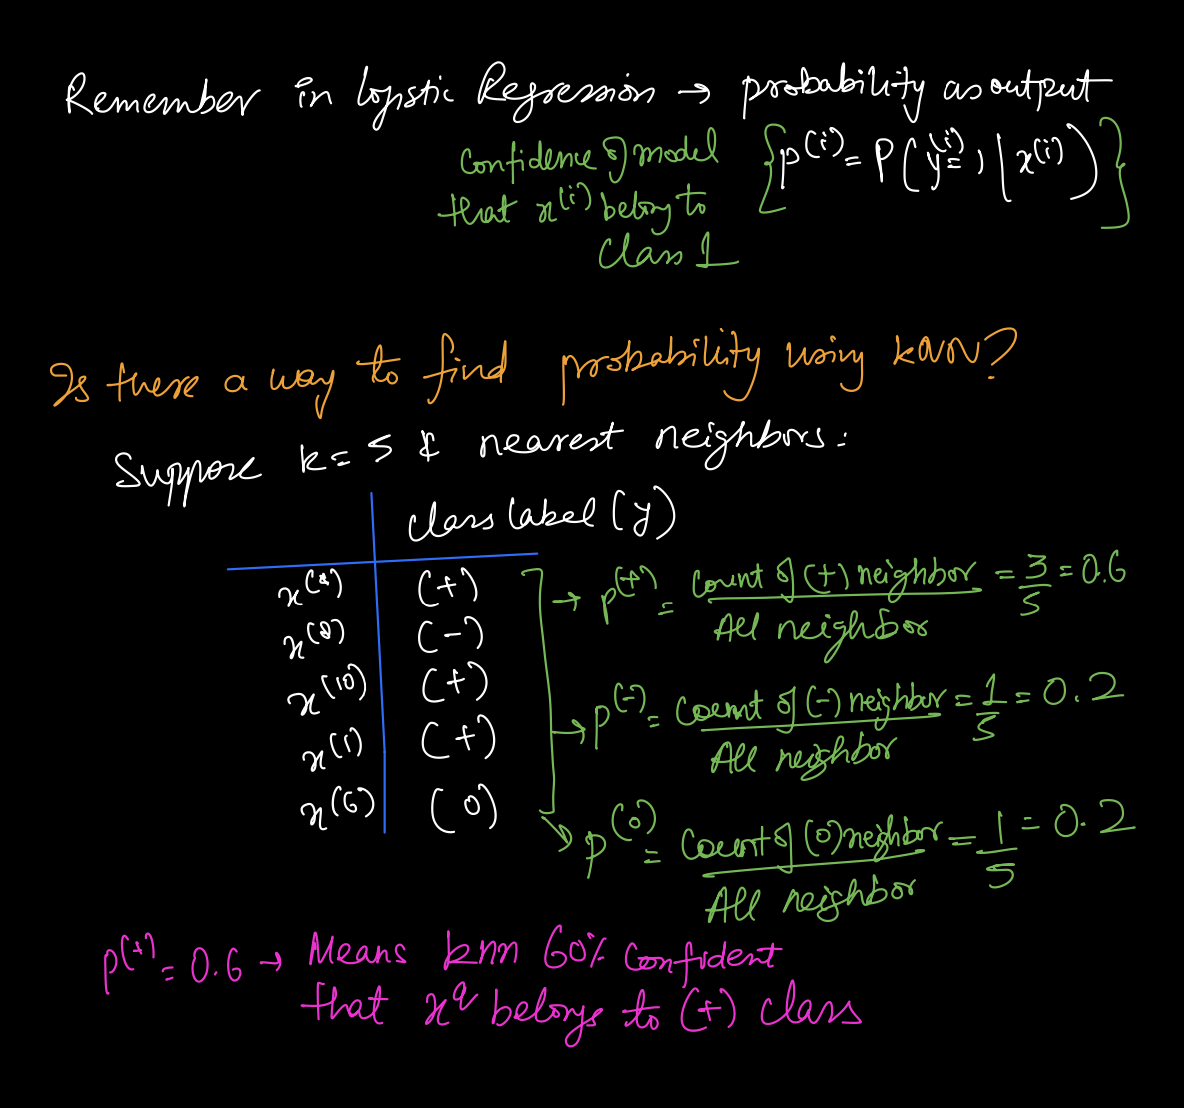

Ans: Suppose k = 5 and the 5 nearest neighbors are:

||Class label (y)|
|:--|:--|
|$x^{(4)}$| $(+)$ |
|$x^{(8)}$| $(-)$ |
|$x^{(10)}$| $(+)$ |
|$x^{(1)}$| $(+)$ |
|$x^{(6)}$| $(o)$ |

Then $p^{(+)} = \frac{count \space of \space all \space the \space (+) \space class \space neighbors}{total \space no \space of \space neighbors} = \frac{3}{5} = 0.6$

- Simiarly $p^{(-)} = \frac{count \space of \space all \space the \space (-) \space class \space neighbors}{total \space no \space of \space neighbors} = \frac{1}{5} = 0.2$

- and $p^{(o)} = \frac{count \space of \space all \space the \space (o) \space class \space neighbors}{total \space no \space of \space neighbors} = \frac{1}{5} = 0.2$


<br>

this shows:
- kNN is 60% confident that $x^q$ has class label $= (+) $

**QUIZ**

```
What will be the probalistic class label when we have K = 10, with 6 +ve and 4 -ve class count ?

a. 0.6 , 0.3
b. 0.80 , 0.12
c. 0.12 , 0.80
d. 0.3 , 0.6
```

**ANSWER**
a. 0.6 , 0.3



# **Application of kNN**

#**LSH (Locality Sensitive Hashing)**

We already know that:
- time time complexity of kNN $= O(nd+ nlogn)$

Such a high time complexity makes:
- kNN not a suitable model for Real World scenarios
- where finding similar data has to happen in real time

<br>

### But ever wondered how **Google images is able to provide pictures of famous monuments** just by **searching a city's name** ?

Ans: To your Surpise:
- Google does uses kNN for this [Google ScaNN: Efficient Vector Similarity Search](https://ai.googleblog.com/2020/07/announcing-scann-efficient-vector.html)







<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/503/original/Screenshot_2023-07-23_at_7.48.56_PM.png?1690134225 width=700>

#### But how kNN works so fast ?

Ans: By using a specific **Hashing Algorithm** called **LSH (Locality Sensitive Hashing)**


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/507/original/Screenshot_2023-07-23_at_7.49.04_PM.png?1690134685 width=700>

Lets have a quick recap on

#### What Hashing is ?

Ans: Hashing is a Data Structuring Algorithm (DSA):

- **Hashing stores data** such that every **Value** has a  **unique Key**
- This makes Hashing table to contain **Key- Value Pair**

|Key|Value|
|:--|:--|
|'Delhi'|['Indian Gate','Red Fort','Qutub Minar']|
|'Mumbai'|['Gateway of India','Marine Drive']|

If we want to know about **Delhi**
- Hash returns ['Indian Gate','Red Fort','Qutub Minar'] as value

<br>

**observe**

Hashing is **analogus to Dictonary**



#### How does LSH work ?


 <img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/508/original/Screenshot_2023-07-23_at_7.49.10_PM.png?1690134720 width=700>

Ans: Lets understand LSH working with a data which looks like:

Suppose if the data looks like:

||f1|f2|f3|
|:--|:--|:--|:--|
|$x^{(1)}$|5|10|7|
|$x^{(2)}$|-1|0|-10|
|$x^{(3)}$|-20|20|20|
|$x^{(4)}$|100|20|30|


<br>

LSH uses a randomized hashing function $h(x)$:
- Which creates the Unqiue keys for the hashtable



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/509/original/Screenshot_2023-07-23_at_7.49.16_PM.png?1690134790 width=700>


Suppose we take a vector of random values $v = [10,-20,30]$,
- so if $f1,f2,f3\geq v$, then value = 1 else 0


||f1|f2|f3|Hash Function $h(x)$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|5|10|7| [0,1,0]|
|$x^{(2)}$|30|0|10|[1,1,0]|
|$x^{(3)}$|-20|20|50| [0,1,1]|
|$x^{(4)}$|8|20|10| [0,1,0]|

<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/510/original/Screenshot_2023-07-23_at_7.49.22_PM.png?1690134950 width=700>


Using the HashFunction
- we club the $x^{(i)}$ which have the same HashFunction value



|Hash Function $h(x)$| value|
|:--|:--|
|[0,1,0]|$x^{(1)}$, $x^{(4)}$|
|[1,1,0]|$x^{(2)}$|
|[0,1,1]|$x^{(3)}$|


<br>

**Observe:**

LSH is grouping similar datapoints together:
- As $x^{(1)}$, $x^{(4)}$ **are grouped into one Key**

This means that for the two points $x^{(1)}$, $x^{(4)}$ :

1. $P(h(x^{(1)}) == h(x^{(4)}))$ will be high:
 -  So LSH concludes $x^{(1)}$ and $x^{(4)}$ are near.
 - Hence give them a single key

2. Similarly, as $P(h(x^{(1)}) == h(x^{(3)}))$ is Low
 - So LSH concludes $x^{(1)}$ and $x^{(3)}$ are far apart
 - Hence give them different key













<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/511/original/Screenshot_2023-07-23_at_7.49.29_PM.png?1690134992 width=700>

<br>

As LSH groups similar datapoints together,
- Now if we have a query point $x^q$ whose hash value = [0,1,0]

Instead of using kNN for the entire data
- kNN is done only for datapoints which have hash value = [0,1,0]

Hence LSH approach fastens the kNN as:
- kNN is performed only on subset of data


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/512/original/Screenshot_2023-07-23_at_7.49.35_PM.png?1690135057 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/513/original/Screenshot_2023-07-23_at_7.49.41_PM.png?1690135113 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/514/original/Screenshot_2023-07-23_at_7.49.47_PM.png?1690135140 width=700>

## **KNN based Imputation**

Suppose for some training data $x^{(i)}$:

- There is missing value at $f_j$

<br>

#### What all techniques to use to for imputing the missing value?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/515/original/Screenshot_2023-07-23_at_7.49.53_PM.png?1690135168 width=700>



ans: Imputing the missing value for $f_j$ at $x^{(i)}:$
1. mean or median of $f_j$ feature
2. Analysing the data and then manually entrying value
3. mean or median of the entire data

<br>


#### Can kNN be used to impute missing data ?

Ans: Yes, but only if we follow these steps:



1. **Step1:** exclude $f_j$ feature from the data

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/516/original/Screenshot_2023-07-23_at_7.50.00_PM.png?1690135208 width=700>



2. **Step2:** Find nearest neighbors for $x^{(i)}$



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/517/original/Screenshot_2023-07-23_at_7.50.06_PM.png?1690135242 width=700>


3. **Step3:** Find mean for $f_j$ feature for the nearest neighbors


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/518/original/Screenshot_2023-07-23_at_7.50.12_PM.png?1690135291 width=700>

- This **mean of $f_j$ for nearest neighbor is  then imputed  for missing value of $x^{(i)}$**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/512/original/Screenshot_2023-07-23_at_7.49.35_PM.png?1690135057 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/513/original/Screenshot_2023-07-23_at_7.49.41_PM.png?1690135113 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/519/original/Screenshot_2023-07-23_at_7.50.31_PM.png?1690135354 width=700>

Lets implement KNNImputator
- By creating a Dummy data having two nan  

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS


Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 23.9MB/s]


In [ ]:
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_imp.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
df_imp.isna().sum()

,0
Region,8
Fresh,13
Milk,15
Grocery,9
Frozen,8
Detergents_Paper,10
Delicassen,11


**observe**

We have ```nan``` values for every feature

Lets see if kNN can impute these missing values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_imp.columns)

In [ ]:
X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [ ]:
X_transformed.isna().sum()


,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


**observe**

kNN imputes every missing value for every feature
- This shows how good kNNImputator is

#**Next Lecture Quiz**

**Quiz-1**

```
What is the main idea behind the k-nearest neighbors (kNN) algorithm?
a) Classification based on decision boundaries
b) Assigning labels based on the neighbors
c) Finding the optimal hyperplane
d) Clustering data points into groups
```
**Correct Answer**
b) Assigning labels based on the neighbors

**Quiz-2**
```
How does the choice of 'k' affect the kNN algorithm?
a) Higher values of 'k' result in a more flexible decision boundary
b) Lower values of 'k' make the algorithm more sensitive to outliers
c) Higher values of 'k' increase computational complexity
d) All of the above
```
Answer: d) All of the above

**quiz-3**

```
What is the main disadvantage of the kNN algorithm?
a) It is computationally expensive for large datasets
b) It assumes that all features have equal importance
c) It cannot handle missing values in the dataset
d) It is sensitive to the choice of distance metric
```

Answer: a) It is computationally expensive for large datasets


**quiz-4**

```
Can kNN be used for regression tasks?
a) Yes
b) No

```
Answer: a) Yes


**quiz-5**

```

What statement is true?
a) Distance metrics has no impact on kNN performance
b) Different distance metrics for different types of data
c) Euclidean distance always outperforms other metrics
d) Manhattan distance is the most robust choice for kNN
```
Answer: b) Different distance metrics are suitable for different types of data